# EDA on Data for Academic Interns in UC Berkeley's CS61A Course

## Imports

In [1]:
# necessary imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

## EDA and Preprocessing

I start by reading in the scraped data into a pandas DataFrame.

In [2]:
ai_61a_df = pd.read_csv("ai_61a_data.csv")
ai_61a_df.head()

,name,pronoun,bio,semester
0,Aakarsh Vermani,he/him/his,Hey I'm Aakarsh and I'm from San Diego. Freshm...,sp23
1,Aarnav Sanghvi,he/him/his,Yo what's up! I'm Aarnav a first year EECS stu...,sp23
2,Aaron Ha,he/him/his,Hi! I'm Aaron an intended CS major from South ...,sp23
3,Aaryan Chandna,he/him/his,Hi! I'm Aaryan a freshman from the Detroit Are...,sp23
4,Abtin Khashayar,he/him/his,Hello! My name is Abtin and I am a freshman fr...,sp23


Next, I want a quick overview of the DataFrame.

In [3]:
ai_61a_df.describe()

,name,pronoun,bio,semester
count,643,626,573,643
unique,637,7,572,6
top,Justin Zhang,he/him/his,Hey I'm Matt! I'm a second-year EECS major fro...,fa22
freq,2,389,2,152


Confirming the $6$ unique semesters and the number of AIs hired:

In [4]:
ai_61a_df['semester'].value_counts()

semester
fa22    152
fa21    132
sp23    130
sp22    125
su22     54
sp21     50
Name: count, dtype: int64

It looks good, it matches the data that I have in `scraper.ipynb`. Something interesting is that for the most part, the number of AIs recruited each semester seems to be increasing, except for the slight dip from `fa22`'s $152$ AIs to `sp23`'s $130$. But thinking more about this, I'm not sure why there would be a decrease. I graduated in Fall of 2022, and I know during that semester a strike occurred that was largely organized by CS students to demand for more funding so that more people could be hired. From the plethora of strike status update emails I received, I recall that the strike was *somewhat* successful and the graduate and undergraduate students received slightly better pay and more benefits, so how did AI hiring numbers go down?

My assumption is maybe that since AIs are *not paid*, it doesn't matter if funding increased or not, the number of opportunities should stay roughly the same. Maybe, since there was a pay increase, the department was able to hire more *tutors* and *TAs* (the roles that are higher in the pyramid than AIs), and so the course didn't have to hire as many AIs. But at the same time, I don't see a reason not to hire *more* AIs. Office Hour queues are an absolute nightmare, especially during project weeks, so more AIs would only help... right?

On a second thought, I'm not entirely sure if 61A AIs help with projects; I think the policy changes each semester depending on the professor and the AI Coordinator. I know 61B AIs definitely help with projects (Gitlet and Enigma... never again, thank god Hilfinger retired). Regardless, it seems like my initial theories here are inconclusive and I'll need to physically go back and see to get an answer.


Going back to the overiew, assuming everyone has a name, there were a total of $643$ AIs scraped from the $6$ semesters of AI pages for CS61A. $637$ of them are unique, meaning some were rehired. This is very interesting, since I had a friend tell me that 61A AIs are *very rarely rehired*. Looking at the `freq` row from the results of `describe()`, it seems like no one was rehired for more than $2$ semesters, once again reinforcing my friend's claims. Now I'm curious to see how who rehired:

In [5]:
# Checking who got rehired for more than one semester
ai_61a_df['name'].value_counts().head(10)

name
Justin Zhang       2
Matthew Ybarra     2
Andrew Wang        2
Bryan Li           2
Andy Chen          2
Wonjae Lee         2
Aakarsh Vermani    1
Jeff Zhou          1
Emma Wu            1
Esther Shen        1
Name: count, dtype: int64

Ok Justin Zhang, Matthew Ybarra, Andrew Wang, Bryan Li, Andy Chen, and Wonjae Lee. The big brain ones I see...

Wait, Wonjae Lee! I remember imputing his pronouns during data scraping, and I had to assume his gender. Let's check if I got his pronouns correct:

In [6]:
# Filter for Wonjae Lee
ai_61a_df[ai_61a_df['name']=='Wonjae Lee']

,name,pronoun,bio,semester
587,Wonjae Lee,he/him/his,Welcome to CS61A,fa21
636,Wonjae Lee,he/him/his,I like cheese,sp21


I imputed his `fa21` pronouns, and it seems I did assume correctly since his `sp21` are the same as my imputed values. It also seems like the rehire occured in consecutive semesters, let's see if that is also the case for the other $5$ rehired AIs.

In [7]:
# Filter is going to look really ugly, but it is what it is
ai_61a_df[(ai_61a_df['name']=='Justin Zhang') | (ai_61a_df['name']=='Matthew Ybarra') | (ai_61a_df['name']=='Andrew Wang') |
          (ai_61a_df['name']=='Bryan Li') | (ai_61a_df['name']=='Andy Chen')].sort_values('name')

,name,pronoun,bio,semester
472,Andrew Wang,he/him/his,Hi! I'm a 2nd year studying computer science a...,fa21
597,Andrew Wang,he/him/his,Heyo! I'm a freshman majoring in EECS and love...,sp21
291,Andy Chen,he/him/his,Hey there! I’m Andy I’m a first-year intended ...,sp22
473,Andy Chen,he/him/his,Hi I'm Andy! I'm a second year intended CS maj...,fa21
28,Bryan Li,he/him/his,Hi I'm a freshman studying mathematics and com...,sp23
491,Bryan Li,he/him/his,Hello! I'm a sophomore studying EECS coming al...,fa21
534,Justin Zhang,he/him/his,What is up guys! My name is Justin and I'm a s...,fa21
621,Justin Zhang,he/him/his,Hello those who decided to read bios of academ...,sp21
78,Matthew Ybarra,he/him/his,Hey I'm Matt! I'm a second-year EECS major fro...,sp23
222,Matthew Ybarra,he/him/his,Hey I'm Matt! I'm a second-year EECS major fro...,fa22


Very interesting. Like Wonjae, everyone else seems to be a rehire *except* for Bryan Li. From reading their bios, the numbers don't add up, as one was a freshman in `sp23` and the other was a sophomore in `fa21`, not to mention their majors are completely different. Unfortunately there's no unique identifier that I could scrape from the AI pages, so issues like these will occur regardless. Nevertheless, this shouldn't negatively affect the question I'm trying to answer.

Admittedly, looking at this makes me a bit salty. I was a 61A AI in Fall of 2021, but was not rehired for Spring of 2022.

Proof:

In [8]:
ai_61a_df[ai_61a_df['name']== 'Daniel Huang']

,name,pronoun,bio,semester
499,Daniel Huang,he/him/his,Hey everyone! I'm Daniel a senior study Data S...,fa21


Whatever, I'm on to greener pastures (sorta).


Returning to the overview, I see that there are $626$ listed pronouns, meaning the DataFrame missing $643-626=17$ pronoun entries. Let's confirm that:

In [9]:
print("Num Empty Pronouns: {}".format(sum(ai_61a_df['pronoun'].isna())))

Num Empty Pronouns: 17


Pronouns are ultimately what I will be using to determine gender, which is the crux of this project's question. Taking a closer look at these $17$ entries:

In [10]:
ai_61a_df[ai_61a_df['pronoun'].isna()]

,name,pronoun,bio,semester
12,Anaiy Somalwar,NaN,Hey! I'm Anaiy and I'm a freshman dual majorin...,sp23
48,Isita Talukdar,NaN,Hello Everyone! I'm Isita and I'm an EECS Fres...,sp23
55,Jessica Ng,NaN,NaN,sp23
101,Runjeet Narula,NaN,Hi everyone! I'm Runjeet a freshman from Seatt...,sp23
111,Sofiia Surzhak,NaN,Hi everyone! I'm a sophomore studying CS and D...,sp23
120,Tyler Zhao,NaN,Hello! I'm Tyler a freshman from Singapore cur...,sp23
130,Aayaan Arora,NaN,What's up. My name is Aayaan and I am a second...,fa22
146,Anna Dymchenko,NaN,Hey! I'm a junior majoring in EECS from Sarato...,fa22
208,Joseph Liu,NaN,Hey hey people Joseph here. Welcome to a littl...,fa22
216,Luke Torre,NaN,1) Stop reading my bio.2) Finish your 61a work...,fa22


I could try to manually input pronouns for these entries by looking at their name, reading their bio, and looking up their photo in their corresponding semester's AI page. $17$ entries however is roughly only $3\%$ of my total data, I think I'm fine with losing $3\%$ of my data and not having to assume someone's gender. I perform the null removal in the following cell:

In [11]:
# remove rows with null pronouns
ai_61a_df = ai_61a_df[~ai_61a_df['pronoun'].isna()]

# check removal
ai_61a_df.describe()

,name,pronoun,bio,semester
count,626,626,558,626
unique,620,7,557,6
top,Andrew Wang,he/him/his,Hey I'm Matt! I'm a second-year EECS major fro...,fa22
freq,2,389,2,144


Removal looks successful. I want to conduct some more exploration, like determining the proportion of male to female AIs and seeing how the proportion changes when grouped by semester. But to do all this I'm going to have to move on to feature engineering.

## Feature Engineering and Analysis

I want to start creating a new feature `gender` with my `pronoun` column, more specifically, I'm going to create a mapping:
* 'he/him/his' -> 'male'
* 'she/her/hers' -> 'female'
* everything else -> 'other'

But to perform the third mapping, I'm going to have to see what "everything else" consists of:

In [12]:
# Filter for pronouns falling under "everything else"
ai_61a_df[~((ai_61a_df['pronoun']=='he/him/his') | (ai_61a_df['pronoun']=='she/her/hers'))]

,name,pronoun,bio,semester
159,Camille Lojewski,they/them/theirs,I took PreCalculus over summer and was so bore...,fa22
248,Sasha Sato,ey/they/he/she,In addition to helping people understand compu...,fa22
274,Winston Li,comrade,My friend asked me to help him round up his 37...,fa22
410,Anand,he/they,Hi! I'm Anand a rising junior majoring in EECS...,su22
439,Max Bograd,they/them/theirs,NaN,su22
449,Rohan Goyal,he/they,Hello there! I'm a rising sophomore (intended ...,su22
620,Jordan Schwartz,she/they,Hey! I'm Jordan and I'm a first year from the ...,sp21


I see comrade makes a return...

On second thought, there are only $7$ entries here (I might've unintentionally created a diversity indicator for AIs in Berkeley's CS department...); there shouldn't be any harm in removing them. At the end of the day, my question doesn't really concern this subset of people, so their data wouldn't have been used either way. I proceed to remove them:

In [13]:
# Remove rows with non-binary pronouns
ai_61a_df = ai_61a_df[(ai_61a_df['pronoun']=='he/him/his') | (ai_61a_df['pronoun']=='she/her/hers')]
ai_61a_df

,name,pronoun,bio,semester
0,Aakarsh Vermani,he/him/his,Hey I'm Aakarsh and I'm from San Diego. Freshm...,sp23
1,Aarnav Sanghvi,he/him/his,Yo what's up! I'm Aarnav a first year EECS stu...,sp23
2,Aaron Ha,he/him/his,Hi! I'm Aaron an intended CS major from South ...,sp23
3,Aaryan Chandna,he/him/his,Hi! I'm Aaryan a freshman from the Detroit Are...,sp23
4,Abtin Khashayar,he/him/his,Hello! My name is Abtin and I am a freshman fr...,sp23
...,...,...,...,...
638,Shiny Weng,she/her/hers,hi! i'm shiny a first-year studying cs and sta...,sp21
639,Shreyas Swaminathan,he/him/his,1st year intended CS and Applied Math Major. I...,sp21
640,SooHyuk Cho,he/him/his,Hello everyone! I'm SooHyuk a first-year inten...,sp21
641,Yash Bhargava,he/him/his,Hey Everyone! My name is Yash and I am from Sa...,sp21


Removal looks successful, $626-7=619$. Now, time to proceed to the mapping. To do so, I use a dictionary with my desired mapping and the pandas function [`pandas.Series.map`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

At the end of the day, this change is just changing one set of strings to another set of strings, the data type doesn't even change. I'm still going to do it though. Personally, it's just easier for me to work with my data this way.

In [14]:
# Establish mapping
pronoun_to_gender_dict = {"he/him/his":"male", "she/her/hers": "female"}

# perform replacement
ai_61a_df['gender'] = ai_61a_df['pronoun'].map(pronoun_to_gender_dict)
ai_61a_df

,name,pronoun,bio,semester,gender
0,Aakarsh Vermani,he/him/his,Hey I'm Aakarsh and I'm from San Diego. Freshm...,sp23,male
1,Aarnav Sanghvi,he/him/his,Yo what's up! I'm Aarnav a first year EECS stu...,sp23,male
2,Aaron Ha,he/him/his,Hi! I'm Aaron an intended CS major from South ...,sp23,male
3,Aaryan Chandna,he/him/his,Hi! I'm Aaryan a freshman from the Detroit Are...,sp23,male
4,Abtin Khashayar,he/him/his,Hello! My name is Abtin and I am a freshman fr...,sp23,male
...,...,...,...,...,...
638,Shiny Weng,she/her/hers,hi! i'm shiny a first-year studying cs and sta...,sp21,female
639,Shreyas Swaminathan,he/him/his,1st year intended CS and Applied Math Major. I...,sp21,male
640,SooHyuk Cho,he/him/his,Hello everyone! I'm SooHyuk a first-year inten...,sp21,male
641,Yash Bhargava,he/him/his,Hey Everyone! My name is Yash and I am from Sa...,sp21,male


With this new feature added, I can take a look at the proportion of male to female students and compute the percentage difference using a formula from this [site](https://www.omnicalculator.com/math/percentage-difference). Additionally, I decided to use [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) to help with visualization.

In [48]:
# Python function that takes in a DataFrame and a binary group label
# Will print the count proportion of each group, compute and print the
# percentage difference between the two values, and display a barplot visualization
# Returns a tuple containing the group proportions in alphabetical order and the percent diff
# Example: if `binary_group=gender`, then the 0th element is `female` proportion
# and the 1st element would be `male` proportion, and third element is percent diff
def compute_proportion_and_visualize(df, binary_group, visualize=False):

    # Helper function to compute percentage difference with formula from:
    # https://www.omnicalculator.com/math/percentage-difference
    # Takes in a x and y and calculates the percentage difference of those two values
    def percent_difference(x, y):
        percent_diff = abs(x - y) / ((x + y)/2)*100
        return percent_diff

    
    # compute proportions and display thereof
    binary_group_series = df.groupby(binary_group).size()
    group_0_proportion = binary_group_series.values[0]/sum(binary_group_series.values)
    group_1_proportion = binary_group_series.values[1]/sum(binary_group_series.values)
    print("{} proportion: {:.2f}".format(binary_group_series.index[0], group_0_proportion))
    print("{} proportion: {:.2f}".format(binary_group_series.index[1], group_1_proportion))

    # call helper percent_difference to display percentage difference
    percent_diff = percent_difference(group_0_proportion, group_1_proportion)
    print("percentage difference: {:.0f}%".format(percent_diff))

    # visualize with seaborn.barplot
    if (visualize):
        plt.title('Count of {} hires for CS61A AI in Recent Semesters'.format(binary_group_series.index.name))
        sns.barplot(x=binary_group_series.index, y=binary_group_series.values)
        plt.ylabel('count')
        plt.show()

    # return the tuple of group proportions
    return (group_0_proportion, group_1_proportion, percent_diff)

female proportion: 0.37
male proportion: 0.63
percentage difference: 51%


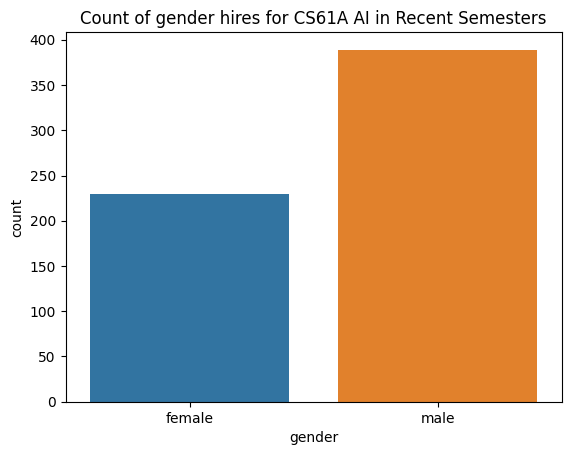

In [49]:
# Call compute_proportion_and_visualize
overall_female_proportion, overall_male_proportion, overall_percent_diff = compute_proportion_and_visualize(ai_61a_df, 'gender', True)

Well then, if this isn't already pretty clear. There is clearly a higher proportion of male to female AIs in CS61A. A proportion of $0.37$ females to $0.63$, resulting in a percentage difference of $51\%$.

I want to see how this data will change when grouped by semester, `sem`. Has the percetage difference changed over the semesters, or has it largely stayed the same? To answer the chronological aspect of this question, I will use a manually ordered list of available semesters:

`sem_list = ['sp21', 'fa21', 'sp22', 'su22', 'fa22', 'sp23']`

In [53]:
# instantiate chronologically correct semester list
sem_list = ['sp21', 'fa21', 'sp22', 'su22', 'fa22', 'sp23']

# Python function that takes in a pandas DataFrame `df`, the name of the filter `filter_feature`
# a list of all the possible filters `filter_list`, and lastly a binary_group to past into 
# `compute_proportion_and_visualize`. This previously implemented function is called on each
# filter group with the passed in `binary_group`
# Returns a list containing the tuples of each proportion pair. Number of pairs is dependent on
# the number of filter_groups in filter_list.
def proportion_analysis_summary(df, filter_feature, filter_list, binary_group):

    # instantiate list to append to
    proportion_pair_list = []
    
    # loop through each filter group
    for filter_group in filter_list:
        curr_df = df[df[filter_feature]==filter_group] # filter for the current filter group in the loop
        
        # print time of current filter group
        print("time: {}".format(filter_group))
        
        # call `compute_proportion_and_visualize` on curr_df and save the tuple
        curr_tuple = compute_proportion_and_visualize(curr_df, binary_group)

        # append curr_tuple to list
        proportion_pair_list.append(curr_tuple)
        print('-----------------------\n') # formatting

    # return final list
    return proportion_pair_list

time: sp21
female proportion: 0.41
male proportion: 0.59
percentage difference: 37%
-----------------------

time: fa21
female proportion: 0.42
male proportion: 0.58
percentage difference: 30%
-----------------------

time: sp22
female proportion: 0.32
male proportion: 0.68
percentage difference: 72%
-----------------------

time: su22
female proportion: 0.31
male proportion: 0.69
percentage difference: 75%
-----------------------

time: fa22
female proportion: 0.40
male proportion: 0.60
percentage difference: 41%
-----------------------

time: sp23
female proportion: 0.35
male proportion: 0.65
percentage difference: 61%
-----------------------



<Axes: xlabel='count', ylabel='semester'>

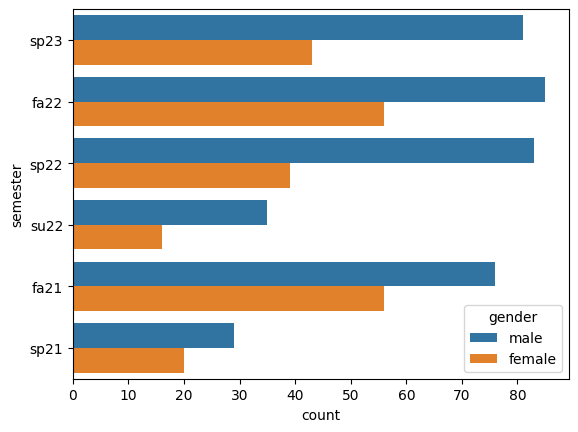

In [54]:
# Call bar_analysis
sem_gender_proportion_tuple_list = proportion_analysis_summary(ai_61a_df, 'semester', sem_list, 'gender')

# visualize
plt.title()
sns.countplot(data=ai_61a_df, y='semester', hue='gender')

Interesting. It is clearly the case the proportion of male AIs have always been greater than that of female AIs. Since I'm dealing with time, I want to visualize with a [lineplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). I want to see how each proportion and the percentage difference has changed over time.

To do this though I need to somehow convert my semester values in `sem_list` into a scalar, since lineplots cannot take in non-scalar values. To do so, I propose the following mapping:

`['sp21', 'fa21', 'sp22', 'su22', 'fa22', 'sp23']` -> `[0, 1, 2, 3, 4, 5]`

Simple, but it should work.

In [19]:
scalar_sem_list = [0, 1, 2, 3, 4, 5]

# Function that displays a lineplot of change in proportion and percentage diff
# of a binary_group in df. df and binary_group are passed in for display header purposes
# it's needed to properly format title and labels
def chrono_analysis(df, binary_group, proportion_tuple_list, time):
    # get proper labels
    binary_group_series = df.groupby(binary_group).size()
    group_0_label = binary_group_series.index[0]
    group_1_label = binary_group_series.index[1]

    # instantiate empty lists to store data for plotting
    chrono_group_0 = []
    chrono_group_1 = []
    chrono_proportion_diff = []
    for tuple in proportion_tuple_list:
        ### tuple structure: ###
        # 0: group 0 proportion
        # 1: group 1 proportion
        # 2: percentage difference

        # append the data as a list pair to the previously instantiated lists
        chrono_group_0.append(tuple[0]) # group 0 proportions
        chrono_group_1.append(tuple[1]) # group 1 proportions
        chrono_proportion_diff.append(tuple[2]/100) # percentages, divide by 100 to get proportion

    # Smooth the data using scipy.make_interp_spline
    # Helper function to smooth the data, drew inspiration from: 
    # https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/#
    def smooth_data_plot(x, y, line_color, line_label):
        x_y_spline = make_interp_spline(x, y)
        x_smooth = np.linspace(min(x), max(x), 500)
        y_smooth = x_y_spline(x_smooth)

        # plot smooted data
        plt.plot(x_smooth, y_smooth, color=line_color, label=line_label)

    ### Non-smoothed plots ###
    # plt.plot(time, chrono_group_0, color='red', label=group_0_label)
    # plt.plot(time, chrono_group_1, color='blue', label=group_1_label)
    # plt.plot(time, chrono_proportion_diff, color='green', label='difference')

    # call helper function for each group
    smooth_data_plot(time, chrono_group_0, 'red', group_0_label)
    smooth_data_plot(time, chrono_group_1, 'blue', group_1_label)
    smooth_data_plot(time, chrono_proportion_diff, 'green', 'difference')

    # format plot
    plt.title("Proportion of Gender Hires for CS61A AI")
    plt.grid()
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Proportion')
    plt.ylim(bottom=0) # want to show origin point
    plt.show()    

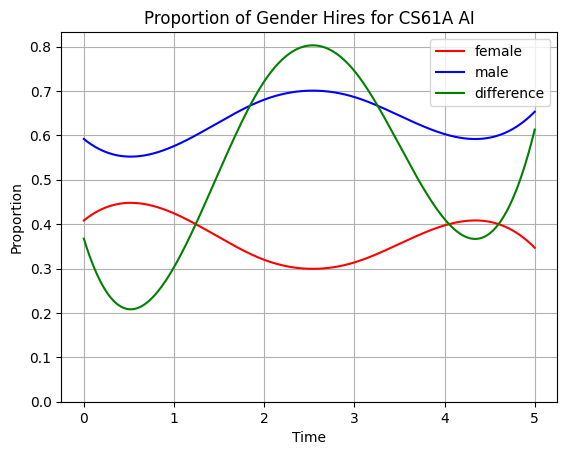

In [20]:
# call chrono_analysis
chrono_analysis(ai_61a_df, 'gender', sem_gender_proportion_tuple_list, scalar_sem_list)

From the plot, it appears that gender diversity has largely stayed stagnant, if not gotten worse, in recent semesters. There was a slight dip in difference proportion at time $4$, Fall 2022 semester, but the male AI proportion quickly bounced back in the most recent semester, Spring 2023.

How do you increase women representation in CS? I'm sure this is a complex problem, and I don't think I know nearly enough about it to warrant an educated opinion. I guess there's a reason why there are programs and scholarships more widely available for women stem.

Regardless, finally moving on to my main question.

## Feature Engineering and Analysis (Main Question)

### Project Motivations and Hypothesis

Over the years, with my various interactions with my fellow peers and students, I've come to notice that women are more likely to send messages in *all lowercase*. Why does this happen? My personal theory is as follows:

Women write in all lowercase because:

1. Gives off cute e-girl doki-doki uwu vibe
2. Relays a feeling of gentleness, giving them a *softer* tone, ultimately making them seem more approachable and nice

I've share this observation of mine with some friends, some have agreed but some also claim to not have noticed or don't think that's the case; hence born the motivation for this project. I want to show that from just the CS61A AI page alone, the girl AIs are more likely to use lowercase to communicate than the guys.

But the page is in an academic setting, and writing messages in an **all** lowercase form is very rare. No, this is not an excuse for me to fall back on in case my theory fails. The reason why it's rare is because classes are often capitalized, like CS61A. Immediately this would destroy the *all* quantifier of my statement. In addition, majors names are often capitalized or abbreviated with their initials, like CS and EECS. Thus, to actually make this project worth the effort I've put in so far, I want to propose a modified version of the previous statement, presented in the form of a hypothesis:

**Hypothesis:** Women are more likely to *not use* proper case in messages than their male counterparts.

There's a change in diction here, *lowercase* vs *proper case*. In a way this kind of changes the argument, but I would argue they manifest in the same way. Outside of proper nouns and abbreviations, capital letters are only ever used at the beginning of a sentence, so commonly after a period. Thus, my hypothesis is saying that since women are more likely to use lowercase, they are also less liekly to be using proper case.

So how would I test for this? I do not know of any traditional method that I have learned in school that would do this, maybe because a question such as this probably really isn't even worth answering since it provides no benefit to society. A/B testing? Modeling? None of these apply. Machine learning to determine message patterns in women vs men, yeah definitely possible and probably the better way to approach this project, but that's beyond my knowledge and probably not worth the effort (like I said, zero benefit to society).

So I'm just going to approach tackle this question my own way. By no means is this going to be a definitive, undisputable answer, it's just going to be evidence that may or may not lean towards my hypothesis. With that said, I am going to extrapolate, or technically in this case feature engineer, the *letter case percentage composition* of all the AIs I have scraped from CS61A.

What is *letter case percentage composition*? I made it up. Previously, I was thinking of just calling the percentage of lowercase letters in women's messages, but that is just way to verbose and it doesn't sound smart. So I racked what little passion I have for chemistry left (passionate in highschool, now the subject is dead to me) and looked to [wikipedia for inspiration](https://en.wikipedia.org/wiki/Letter_case) and arrived at this term. Thus, its formal definition:

**letter case percentage composition** (LCPC)

*noun*

1. in the context of a message, the manner of being composed; makeup; constitution; quantified in percentage of upper and lowercase letters.

In layman's terms, given a message, what is the percentage of upper and lowercase letters.

With all that said, let me get started on just that.

### Feature Engineering - Letter Case Percentage Composition

To compute percentage composition, I need to get a character count for each AI's bio. But before I do that, I need to clean their bio up a little bit more, since it is being inflated by whitespace characters and punctuation. I can do that quite simply with regex, specifically [`pandas.Series.str.replace`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html):

In [21]:
# pattern of characters to remove in bio
remove_pattern = "[\s.,'!?;:()-]"

# perform removal
ai_61a_df['clean_bio'] = ai_61a_df['bio'].str.replace(remove_pattern, '', regex=True)
ai_61a_df.head(5)

,name,pronoun,bio,semester,gender,clean_bio
0,Aakarsh Vermani,he/him/his,Hey I'm Aakarsh and I'm from San Diego. Freshm...,sp23,male,HeyImAakarshandImfromSanDiegoFreshmanstudyingE...
1,Aarnav Sanghvi,he/him/his,Yo what's up! I'm Aarnav a first year EECS stu...,sp23,male,YowhatsupImAarnavafirstyearEECSstudentfromtheB...
2,Aaron Ha,he/him/his,Hi! I'm Aaron an intended CS major from South ...,sp23,male,HiImAaronanintendedCSmajorfromSouthKoreaItsmyf...
3,Aaryan Chandna,he/him/his,Hi! I'm Aaryan a freshman from the Detroit Are...,sp23,male,HiImAaryanafreshmanfromtheDetroitAreastudyingE...
4,Abtin Khashayar,he/him/his,Hello! My name is Abtin and I am a freshman fr...,sp23,male,HelloMynameisAbtinandIamafreshmanfromSanJosest...


Unfortunately the removal is not complete. AIs are young people, and many of them use emojis and innovative other what-nots that I'm too boomer to keep up with. Thus, it is inevitable that there will be a little bit of character bloat. Nonetheless, I do believe that my removal pattern is comprehensive enough that the bloat retained is minimal, so I will continue to proceed.

Finally, the most important part of the project; determine the percentage of uppercase letters; lowercase can found in a similar way, and since I'm dealing with percentage, might as well get the total character count as well.

To start, I create the following three features that will be used to help me determine percentage composition

1. `letter_count`: num letters in the clean bio
2. `uppercase_count`: num uppercase letters in the clean bio
3. `lowercase_count`: num lowercase letters in the clean bio

In [22]:
# append feature #1
# this is essentially treating `clean_bio` as a String and calling `str.len` to get the length
ai_61a_df['letter_count'] = ai_61a_df['clean_bio'].apply(lambda clean_bio: len(str(clean_bio)))

# append feature #2
# this is a pretty complicated function, but I use the pandas.Series.apply function
# and then create a lambda function that takes in the column `clean_bio`
# which gets converted into a String, and as a String, I loop through it in a list comprehension, creating  
# a list that contains the value 1 if a letter is upper and 0 othwerise; the list gets summed up at the end
# essentially becoming a count for uppercase letters.
ai_61a_df['uppercase_count'] = ai_61a_df['clean_bio'].apply(lambda clean_bio: sum([1 if letter.isupper() else 0 for letter in str(clean_bio)]))

# append feature #3
# essentially the same as above but uses `str.islower` instead of `str.isupper``
ai_61a_df['lowercase_count'] = ai_61a_df['clean_bio'].apply(lambda clean_bio: sum([1 if letter.islower() else 0 for letter in str(clean_bio)]))

# project `clean_bio` and new features as a check
ai_61a_df[['clean_bio', 'letter_count', 'uppercase_count', 'lowercase_count']].head()


,clean_bio,letter_count,uppercase_count,lowercase_count
0,HeyImAakarshandImfromSanDiegoFreshmanstudyingE...,222,14,205
1,YowhatsupImAarnavafirstyearEECSstudentfromtheB...,174,12,160
2,HiImAaronanintendedCSmajorfromSouthKoreaItsmyf...,134,15,117
3,HiImAaryanafreshmanfromtheDetroitAreastudyingE...,117,11,106
4,HelloMynameisAbtinandIamafreshmanfromSanJosest...,143,11,132


Notice that it is not necessarily the case that `letter_count` $=$ `uppercase_count` $+$ `lowercase_count`. This is unsurprising; I mentioned the removal pattern was not comprehensive, and this is fine.

With these three features, I can easily compute the *letter case percentage composition:

* `lowercase_percentage` $=$ `lowercase_count` $/$ `letter_count`
* `uppercase_percentage` $=$ `uppercase_count` $/$ `letter_count`

In [23]:
# append lowercase_percentage
ai_61a_df['lowercase_percentage'] = ai_61a_df['lowercase_count']/ai_61a_df['letter_count']*100

# append uppercase_percentage
ai_61a_df['uppercase_percentage'] = ai_61a_df['uppercase_count']/ai_61a_df['letter_count']*100

# project `clean_bio`, `gender`, and new features as a check
ai_61a_df[['gender', 'clean_bio', 'lowercase_percentage', 'uppercase_percentage']].head()

,gender,clean_bio,lowercase_percentage,uppercase_percentage
0,male,HeyImAakarshandImfromSanDiegoFreshmanstudyingE...,92.342342,6.306306
1,male,YowhatsupImAarnavafirstyearEECSstudentfromtheB...,91.954023,6.896552
2,male,HiImAaronanintendedCSmajorfromSouthKoreaItsmyf...,87.313433,11.194030
3,male,HiImAaryanafreshmanfromtheDetroitAreastudyingE...,90.598291,9.401709
4,male,HelloMynameisAbtinandIamafreshmanfromSanJosest...,92.307692,7.692308


Alright. The moment of truth. Time to see the distribution of `uppercase_percentage` grouped by `gender`. In the following cell, I implement a Python function that helps me visualize with a histogram the distribution density of a binary group.

In [24]:
# Function that takes in a pandas DataFrame `df`
# `
def density_hist_gender(df, percentage_column):

    # extrapolate male data
    male_percentage_series = df[df['gender']=='male'][percentage_column]
    # extrapolate female data
    female_percentage_series = df[df['gender']=='female'][percentage_column]

    # plot overlaid density histograms
    plt.hist(male_percentage_series, color='blue', label='male', density=True, alpha=0.5)
    plt.hist(female_percentage_series, color='red', label='female', density=True, alpha=0.5)
    # plot formatting
    plt.title('Density Distribution of Male and Female LCPC for {}'.format(percentage_column))
    plt.ylabel('Density')
    plt.xlabel('Percentage Composition of {}'.format(percentage_column))
    plt.legend()
    plt.show()

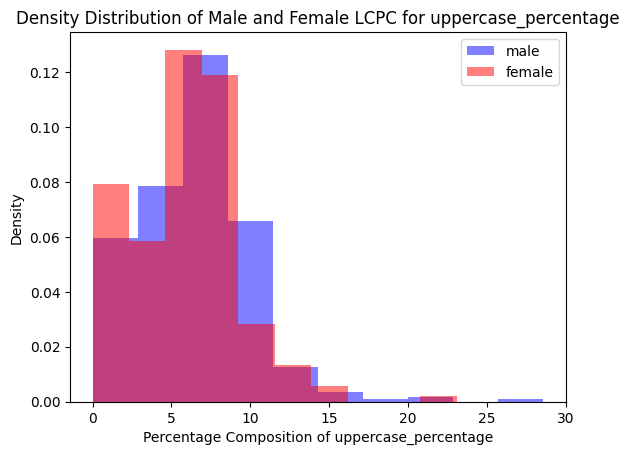

In [25]:
# call density_hist_gender on uppercase_percentage
density_hist_gender(ai_61a_df, 'uppercase_percentage')

**AS EXPECTED**. The distribution for male AIs is clearly further to the right of that of female AIs, and seems to be mostly unimodal with a peak at around $7\%$. It can be clearly observed that the distribution of female AIs is bimodal, with a peak at around $6\%$, which is less than that of male AI's $7\%$ **and** another peak near $0\%$. This means that female AIs are more likely to have a *lower* uppercase percentage, which means, on average, they use uppercase letters less frequently than male AIs.

Out of curiousity, let's see what the distribution looks like when looking at `lowercase_percentage`:

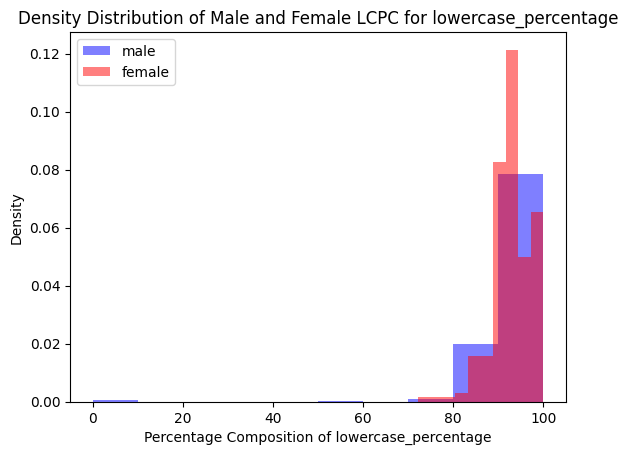

In [26]:
# call density_hist_gender on lowercase_percentage
density_hist_gender(ai_61a_df, 'lowercase_percentage')

This tells a similar story, but is probably less conclusive. Looking at the male AI distribution, there seems to be a higher chance for the lowercase_percentage to be close to $100\%$ than female AIs. **But**, the intense peak for the distribution of female AIs cannot be ignored, the peak is much more significant than that of male AIs, and it seems to be centered around $90\%$. So even if males are more likely to be near $100\%$, females are more likely to belong in that upper $90\% - 100\%$ range.

Lastly, I want to compare summary statistics of male vs female AI LCPC, or their `uppercase_percentage` and `lowercase_percentage`. I will simply use `df.describe` to accomplish that:

In [27]:
# summary statistics for male AI LCPC
print('Male AI Summary Statistics:')
male_summary_stats = ai_61a_df[ai_61a_df['gender']=='male'][['uppercase_percentage', 'lowercase_percentage']].describe()
print(male_summary_stats, end='\n--------------------------\n')

# summary statistics for female AI LCPC
print('Female AI Summary Statistics:')
female_summary_stats = ai_61a_df[ai_61a_df['gender']=='female'][['uppercase_percentage', 'lowercase_percentage']].describe()
print(female_summary_stats)

Male AI Summary Statistics:
       uppercase_percentage  lowercase_percentage
count            388.000000            388.000000
mean               6.375238             92.145090
std                3.839752              8.057140
min                0.000000              0.000000
25%                4.686281             90.506979
50%                6.595259             92.577288
75%                8.453810             94.657640
max               28.571429            100.000000
--------------------------
Female AI Summary Statistics:
       uppercase_percentage  lowercase_percentage
count            230.000000            230.000000
mean               5.699156             93.067518
std                3.610631              4.384842
min                0.000000             72.063492
25%                4.033648             90.843186
50%                5.882353             93.220622
75%                7.748477             95.141007
max               23.076923            100.000000


As one can observe, the mean, max, and **all of the quartiles**, meaning the $25th$ percentile, median, and $75th$ percentile for `uppercase_percentage` for female AIs are *lower* than that of their male counterpart, which supports the shape of the density histograms displayed. And in the same vein, the `lowercase_percentage` for female AIs are *higher* than their male counterpart.

I do want to point out the existence of a $0.0$ `min`. I think this may be due to empty bios, which definitely exist.


## Hypothesis Testing - A/B Test

At first, I didn't even consider hypothesis testing. It wasn't until that I brought up my findings above to one of my friends that, yes, hypothesis testing *can be done*. A test statistic could just be male `uppercase_percentage ` $-$ female `uppercase_percentage`. And `gender` is a binary label! These satisfy all the requirements for an A/B test.

So to start, I define my hypotheses as such: 

**Null Hypothesis:** In CS61A, distribution of female AI `uppercase_percentage` is the same as male AI `uppercase_percentage`. Any differences in the sample is simply due to chance.

**Alternative Hypothesis:** In CS61A, the distribution of female AI `uppercase_percentage` is on average *lower* than male AI `uppercase_percentage`.

For my test statistic, I will be using the difference between the two group's `uppercase_percentage` average/mean, specifically male AI `uppercase_percentage` mean *minus* female AI `uppercase_percentage` mean. This means that larger values will favor the alternative hypothesis. A naive $\alpha=0.05$ will be used as the $p$-value cutoff.

To start, I compute the observed value of the test statistic.

In [28]:
# Extrapolate uppercase percentage means from summary stats 
male_uppercase_percentage_mean = male_summary_stats['uppercase_percentage']['mean']
female_uppercase_percentage_mean = female_summary_stats['uppercase_percentage']['mean']
# Display
print('Male AI uppercase percentage mean: {:8.4f}'.format(male_uppercase_percentage_mean))
print('Female AI uppercase percentage mean: {:.4f}'.format(female_uppercase_percentage_mean))

obs_diff = male_uppercase_percentage_mean - female_uppercase_percentage_mean
print('Observered Difference: {:20.4f}'.format(obs_diff))

Male AI uppercase percentage mean:   6.3752
Female AI uppercase percentage mean: 5.6992
Observered Difference:               0.6761


The observed test statistic, or the difference in `uppercase_percentage` means between female AIs and male AIs in that order, is around $0.68$.

Next, I implement a Python function that performs the A/B test. I essentially copy and pasted this function from [another project](https://github.com/dnhuang/sf-tri-city-restaurants/blob/main/analysis.ipynb) that I worked on, but made some modificiations to suit this project specifically.

In [29]:
# Function that performs the A/B test.
# Takes in the DataFrame, the name of the column to be averaged, the binary label to group by,
# the observed difference, and a naive alpha value (p-value cutoff).
# Plots the distribution density of the average differences, concludes whether or not to reject
# the null hypotheseis, and returns the empirical p-value.
def ab_test(df, col, group, rep, obs_diff, alpha):

    # Helper function for ONE simulation of the hypothesis test
    def simulate_test(df, group):
        # Shuffle labels, must sample with WITHOUT replacement
        new_labels = df.sample(len(df), replace=False).reset_index()[group]
        # Project desired columns and add shuffled labels
        sample_df = df[[col]] # projection
        sample_df['shuffled_label'] = new_labels
        # Get averages of the two groups (0th value is regular restaurants, 1st is chain)
        sample_df_series = sample_df.groupby('shuffled_label').mean()
        # test statistic is defined as male - female
        sample_diff = sample_df_series[col][1] - sample_df[col][0] # 1st: male, 0th: female
        return sample_diff
    
    # Use helper function to compute test statistic. Repeat for rep repetitions
    test_statistic_list = np.array([])
    for _ in np.arange(rep):
        sim_test_statistic = simulate_test(df, group)
        test_statistic_list = np.append(test_statistic_list, sim_test_statistic)
    
    empirical_p = np.count_nonzero(test_statistic_list >= obs_diff)/ rep

    # Plot the distribution density of the average differences
    plt.hist(test_statistic_list, density=True)
    plt.grid()
    plt.scatter(obs_diff, 0.02, color='red')
    plt.title('Density Distribution of Average Differences Under the Null')
    plt.xlabel('Average Difference')
    plt.ylabel('Average Difference Density')

    # Print conclusions
    print('Simulation under the Null with {} repetitions'.format(rep))
    print("With observed difference={:.4f}, naive \u03B1={}, and empirical p-value={},".format(obs_diff, alpha, empirical_p))
    print("we {} the null hypothesis".format("FAIL TO REJECT" if empirical_p > alpha else "REJECT"))
    return empirical_p

With `ab_test` implemented, I now perform the A/B test:

Simulation under the Null with 5000 repetitions
With observed difference=0.6761, naive α=0.05, and empirical p-value=0.0,
we REJECT the null hypothesis


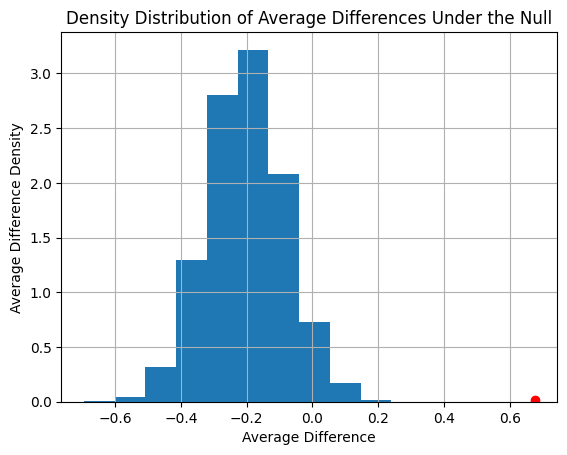

In [30]:
# Suppress SwettingwithCopyWarning
pd.set_option('mode.chained_assignment', None)

# Perform the A/B test
empirical_p = ab_test(ai_61a_df, 'uppercase_percentage', 'gender', 5000, obs_diff, 0.05)

Reiterating again the parameters of my A/B test. With a naive $\alpha=0.05$, our $p$-value cutoff, and by simulating $5000$ repetitions under the null hypothesis, I obtained a $p$-value of $0.0$, and the computation is supported by the histogram. The histogram is centered around $-0.2$ and mostly unimodal. Despite its spread, we can see that our observed value of the test statistic, the red dot, is very far off to the right.

Finally, since my empirical $p$-value is **less** than my $\alpha=0.05$, I reject the null hypothesis and lean towards the alternative, meaning my test supports the hypothesis that in CS61A, the distribution of female AI `uppercase_percentage` is on average *lower* than male AI `uppercase_percentage`.

Now, can the results of these findings be generalized to the overall population? Definitely not, the AIs of CS61A at UC Berkeley are by no means representative of the entire populuation, but I don't think that means the evidence presented here is pointless. I had to start somewhere and with my current knowledge, there's only so little data I can actually curate or scrape. At the very least, for me personally, I think this project has given me a tiny bit of reinforcement in my observations.

## Conclusion

This isn't a lab report nor a school assignment, so I don't want to meet some dumb wordcount or length.

To conclude, the evidence that I have presented seems to favor the alternative hypothesis. Although the methods and testing done in this project is far from official in any capacity, I think with the way I preprocessed, wrangled, and transformed the data is valid, and I have explained my reasoning thoroughly throughout each step.

With all that said, I think I will stick to my theory.

Girls are more likely to use lowercase letters in their messages to give off that soft, cute e-girl doki doki uwu vibe.